## CARGA DE DATOS

* pickle.load
* numpy.genfromtxt

In [10]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import random
import scipy 
from scipy import stats
from collections import Counter
import pickle as pkl
import random
import seaborn as sns

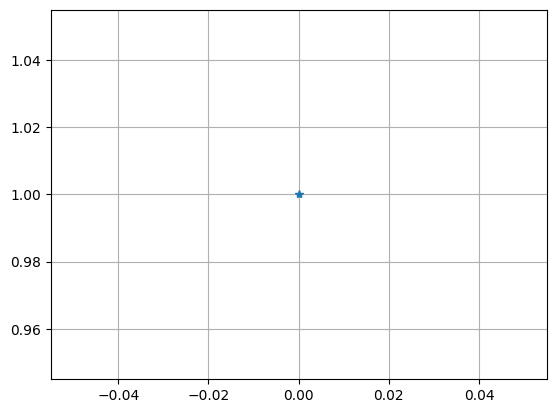

In [11]:
x = 0
y = 1
plt.plot(x, y, marker = "*")

plt.grid()
plt.show()

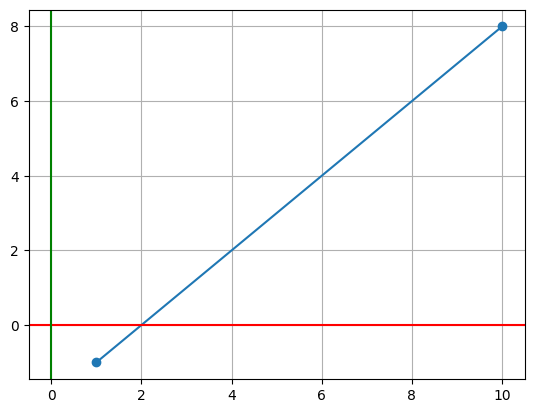

In [12]:
x = [1, 10]
y = [-1, 8]

plt.plot(x, y, marker = "o")


# Esta función la podemos usar para marcar el eje X
plt.axhline(0, color = "red")

# Esta función la podemos usar para marcar el eje Y
plt.axvline(0, color = "green") 

plt.grid()
plt.show()

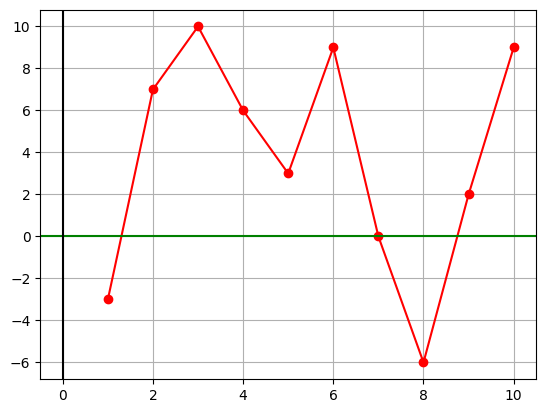

In [13]:
x = np.linspace(1, 10, 10)
y = [-3, 7, 10, 6, 3, 9, 0, -6, 2, 9]

plt.plot(x, y, marker = "o", color = "red")

# Eje X
plt.axhline(0, color = "green")

# Eje Y
plt.axvline(0, color = "black") 

plt.grid()
plt.show()

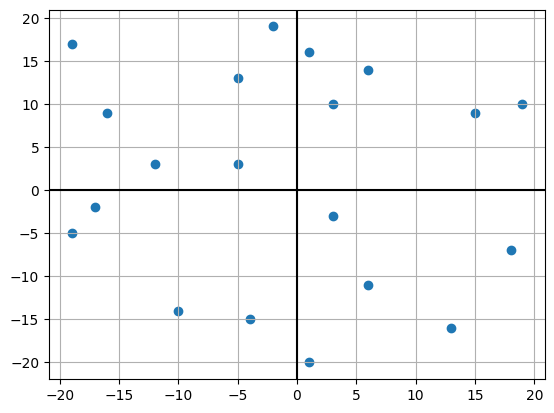

In [14]:
X = [random.randint(-20, 20) for x in range(20)]
Y = [random.randint(-20, 20) for x in range(20)]

plt.scatter(X, Y)

# Eje X
plt.axhline(0, color = "black")

# Eje Y
plt.axvline(0, color = "black") 

plt.grid()
plt.show()


In [15]:
#cargar un dataset en numpy



In [16]:
with open("FUELCONSUMPTION_CITY.pkl", "br") as f:
          city_consumption = pkl.load(f)
       
          
city_consumption

array([ 9.9, 11.2,  6. , ..., 13.4, 12.9, 14.9], shape=(1067,))

In [17]:
city_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1, dtype=np.float32)
road_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(9), delimiter=",", skip_header=1, dtype=np.float32)
manufacturers = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(1), delimiter=",", skip_header=1, dtype=str)
city_consumption
road_consumption
manufacturers

array(['ACURA', 'ACURA', 'ACURA', ..., 'VOLVO', 'VOLVO', 'VOLVO'],
      shape=(1067,), dtype='<U13')

## MAX MIN MEAN MEDIAN ROUND

In [18]:
print(manufacturers.dtype)
print(manufacturers.shape)


<U13
(1067,)


In [19]:
print(f"Consumo medio en ciudad: {np.round(np.mean(city_consumption),2):.2f}")
print(f"Coche que mas consume en ciudad: {np.round(np.max(city_consumption),2):.2f}")
print(f"Coche que menos consume en ciudad: {np.round(np.min(city_consumption),2):.2f}")
print(f"Consumo mediana en ciudad: {np.round(np.median(city_consumption),2):.2f}")
print(f"Consumo medio en carretera: {np.round(np.mean(road_consumption),2):.2f}")
print(f"Coche que mas consume en carretera: {np.round(np.max(road_consumption),2):.2f}")
print(f"Coche que menos consume en carretera: {np.round(np.min(road_consumption),2):.2f}")
print(f"Consumo mediana en carretera: {np.round(np.median(road_consumption),2):.2f}")

Consumo medio en ciudad: 13.30
Coche que mas consume en ciudad: 30.20
Coche que menos consume en ciudad: 4.60
Consumo mediana en ciudad: 12.60
Consumo medio en carretera: 9.47
Coche que mas consume en carretera: 20.50
Coche que menos consume en carretera: 4.90
Consumo mediana en carretera: 8.80


## HISTOGRAMA

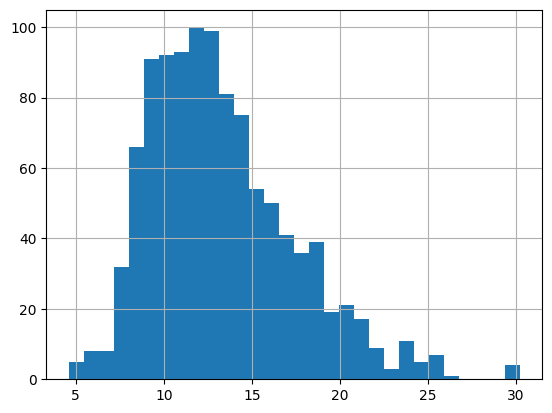

In [20]:
plt.hist(city_consumption, bins=30); # el punto y como final evita que aparezca el array
plt.grid()#bins es la cantidad de barras del histograma

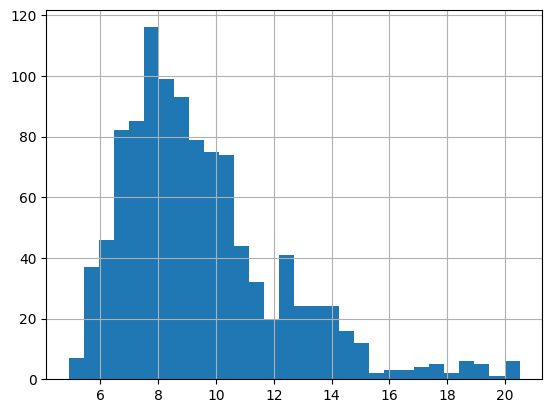

In [21]:
plt.hist(road_consumption, bins=30);
plt.grid()

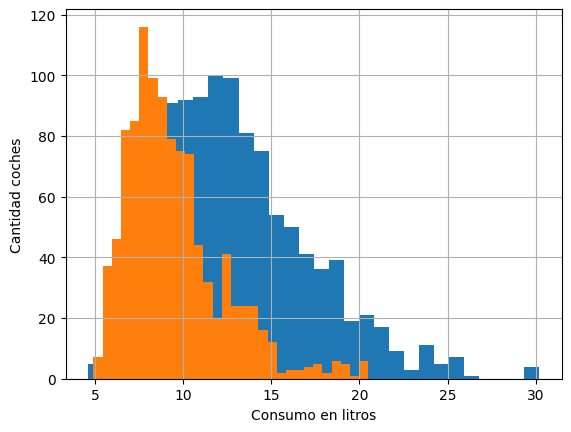

In [22]:
#superponer los graficos
plt.hist(city_consumption, bins=30);
plt.hist(road_consumption, bins=30);
plt.xlabel("Consumo en litros")
plt.ylabel("Cantidad coches")
plt.grid()

## QUANTILES Y PERCENTILES

In [23]:
np.quantile(a = city_consumption, q= 0.25, interpolation = "lower") #primer quartil
np.quantile(a = city_consumption, q= 0.5, interpolation = "lower")  #segundo quartil 
np.quantile(a = city_consumption, q= 0.75, interpolation = "lower") #te4rmer quartil
np.quantile(a = city_consumption, q = [0.25, 0.50, 0.75], interpolation = "lower")

array([10.2, 12.6, 15.5], dtype=float32)

In [24]:
# Filtros: mascara booleana
city_consumption[city_consumption >= 26]
#np.where

array([30. , 30.2, 26.7, 30. , 30.2], dtype=float32)

## RANGO

In [25]:
#Rango
print(f"Rango consumo ciudad: {round(np.max(city_consumption) - np.min(city_consumption),2):.2f}") #con redondeo y dos decimales
print(f"Rango consumo carretera: {np.max(road_consumption) - np.min(road_consumption)}")


Rango consumo ciudad: 25.60
Rango consumo carretera: 15.600000381469727


In [26]:
#rango quartiles rango intercuartilico IQR
# 1,5 veces mas alla del iqr se consideran valores anomalos o outliers
q1 = np.quantile (a= city_consumption, q= 0.25, interpolation = "lower")
q3 = np.quantile (a= city_consumption, q= 0.75, interpolation = "lower")
iqr = q3-q1
print(f"Rango intercuartilico IQR: {iqr}")

Rango intercuartilico IQR: 5.300000190734863


## PINTAR LINEAS EN UN GRAFICO

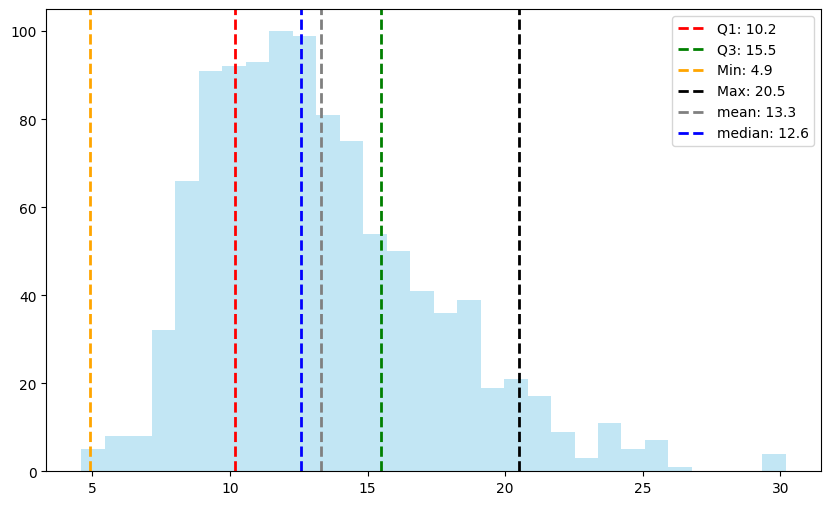

In [27]:
#pintar media, mediana, q1, q3, min, max en un histograma
c_mini = np.min(road_consumption)
c_maxi = np.max(road_consumption)
c_media = np.mean(city_consumption)
c_mediana = np.median(city_consumption)

plt.figure(figsize=(10, 6))
plt.hist(city_consumption, bins=30, color='skyblue', alpha=0.5)
plt.axvline(q1, color='red', linestyle= 'dashed', linewidth=2, label=(f"Q1: {q1:.1f}"))
plt.axvline(q3, color='green', linestyle= 'dashed', linewidth=2, label=(f"Q3: {q3:.1f}"))
plt.axvline(c_mini, color='orange', linestyle= 'dashed', linewidth=2, label=(f"Min: {c_mini:.1f}"))
plt.axvline(c_maxi, color='black', linestyle= 'dashed', linewidth=2, label=(f"Max: {c_maxi:.1f}"))
plt.axvline(c_media, color= 'grey', linestyle= 'dashed', linewidth=2, label=(f"mean: {c_media:.1f}"))
plt.axvline(c_mediana, color= 'blue', linestyle= 'dashed', linewidth=2, label=(f"median: {c_mediana:.1f}"))
plt.legend() 
plt.show()

#plt.grid()



## BOXPLOT

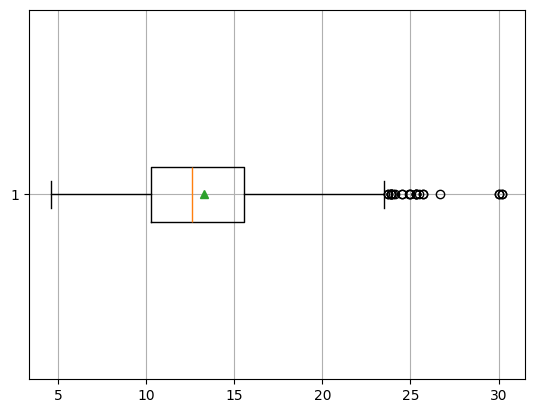

In [28]:
#boxplot calcula y muestra los valores IQR, max, min,,mediana
#plt.boxplot(city_consumption); #showmeans= True me mostraría tambien la media
plt.boxplot(city_consumption, showmeans=True, orientation="horizontal")
plt.grid()

## FILTRAR

In [29]:
#Filtrar usando percentiles
print(np.percentile(city_consumption, 10)) #es lo mismo uno que otro
print(np.quantile(city_consumption, 0.1))

percentil_10 = np.percentile(city_consumption, 10)
percentil_90 = np.percentile(city_consumption, 90)
print(f"percentil 10: {round(percentil_10 ,2):.2f}") #aca se ve mejor el redondeo y como se muestra
print(f"percentil 90: {percentil_90}")


#coches que menos consumen
coches_menor_consumo = city_consumption[city_consumption <= percentil_10]
#coches que mas consumen
coches_mayor_consumo = city_consumption[city_consumption >= percentil_90]

print("10 % coches menor consumo")
# print(coches_menor_consumo.shape)
print(f"media: {round(np.mean(coches_menor_consumo),2):.2f}")
print("10 % coches mayor consumo")
# print(coches_mayor_consumo.shape)
print(f"media: {round(np.mean(coches_mayor_consumo),2):.2f}")

8.7
8.7
percentil 10: 8.70
percentil 90: 18.799999237060547
10 % coches menor consumo
media: 7.83
10 % coches mayor consumo
media: 21.57


## VARIANZA Y DESVIO ESTANDAR

In [30]:
#Varianza: Que dispersion tienen los datos con respecto a la media
varianza = np.var(city_consumption)
print(f"Varianza: {varianza}")

#Desviación estandar: raiz cuadrada de la varianza
desviacion = np.std(city_consumption)
print(f"Desviacion estandar: {desviacion:.2f}")

Varianza: 16.804515838623047
Desviacion estandar: 4.10


## COUNTER

In [31]:
#contar cuantos coches hay de cada marca
conteo = Counter(manufacturers)

#guardar los 10 fabricantes que mas se repiten en este dataset
top_10 = conteo.most_common(10)

#mostrarlo con mejor formato
for fabri, count in top_10:
    print(f"Fabricante  {fabri} tiene {count} coches")

#desempaquetar en dos array
fabricantes, conteos = zip(*top_10)

top_10
print(fabricantes)
print(conteos)


#moda de manufacturers


Fabricante  FORD tiene 90 coches
Fabricante  CHEVROLET tiene 86 coches
Fabricante  BMW tiene 64 coches
Fabricante  MERCEDES-BENZ tiene 59 coches
Fabricante  AUDI tiene 49 coches
Fabricante  GMC tiene 49 coches
Fabricante  TOYOTA tiene 49 coches
Fabricante  PORSCHE tiene 44 coches
Fabricante  VOLKSWAGEN tiene 42 coches
Fabricante  DODGE tiene 39 coches
(np.str_('FORD'), np.str_('CHEVROLET'), np.str_('BMW'), np.str_('MERCEDES-BENZ'), np.str_('AUDI'), np.str_('GMC'), np.str_('TOYOTA'), np.str_('PORSCHE'), np.str_('VOLKSWAGEN'), np.str_('DODGE'))
(90, 86, 64, 59, 49, 49, 49, 44, 42, 39)


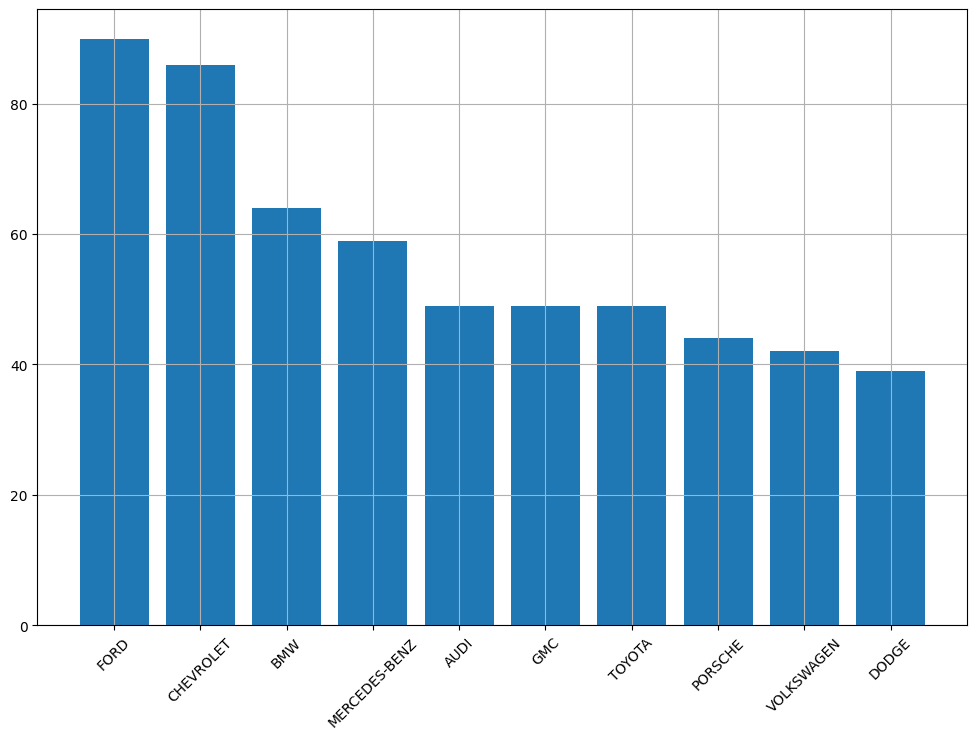

In [32]:
#grafico de barras
plt.figure(figsize=(12, 8))
plt.bar(fabricantes, conteos)
plt.xticks(rotation=45); #o bien utilizar plt.barh
plt.grid()

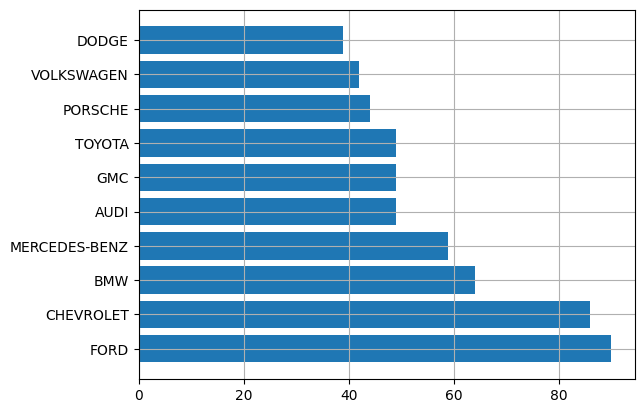

In [33]:
plt.barh(fabricantes, conteos)
plt.grid()

## FUNCION OUTLINERS

In [34]:
#metodo para ver outliers
def filtrar_outliers(array, k):
    Q1 = np.percentile(array, 25)
    Q3 = np.percentile(array, 75)
    IQR = Q3 - Q1
    limite_inf = Q1 - IQR * k
    limite_sup = Q3 + IQR * k
    array_sin_outliers = array[(array >= limite_inf) & (array <= limite_sup)]
    return array_sin_outliers

In [35]:
city_consumption.shape #1067 vehiculos
array_sin_outliners = filtrar_outliers(city_consumption, k=1.3)
print(city_consumption.shape)
print(array_sin_outliners.shape)

(1067,)
(1036,)


## Correlacion
- 0: asociación nula. No hay correlacion
- 土 0.1: asociación pequeña.
- 土 0.3: asociación mediana.
- 土 0.5: asociación moderada.
- 土 0.7: asociación alta.
- 土 0.9: asociación muy alta.

* -1 correlación negativa


In [36]:
#Correlacion  entre dos variables 09.estadistica.03
city_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(8), delimiter=",", skip_header=1, dtype=np.float32)
road_consumption = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(9), delimiter=",", skip_header=1, dtype=np.float32)
engine_cc = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(4), delimiter=",", skip_header=1, dtype=np.float32)
co2_emissions = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(12), delimiter=",", skip_header=1, dtype=np.float32)
cylinders = np.genfromtxt("FuelConsumptionCo2.csv", usecols=(5), delimiter=",", skip_header=1, dtype=np.int8)

print(co2_emissions)
print(engine_cc)
print(cylinders)


[196. 221. 136. ... 271. 260. 294.]
[2.  2.4 1.5 ... 3.  3.2 3.2]
[4 4 4 ... 6 6 6]


In [37]:
print(f"cylinders / citi_consumption: {stats.pearsonr(cylinders, city_consumption)[0]}") 
print(f"cylinders / cylinders: {stats.pearsonr(cylinders, cylinders)[0]}")
print(f"cylinders / road_consumption: {stats.pearsonr(cylinders, road_consumption)[0]}")
print(f"cylinders / engyne_cc: {stats.pearsonr(cylinders, engine_cc)[0]}")
print(f"cylinders / co2_emissions: {stats.pearsonr(cylinders, co2_emissions)[0]}")
#correlacion ALTA entre cilindros y consumo en ciudad

cylinders / citi_consumption: 0.7964725642795258
cylinders / cylinders: 1.0
cylinders / road_consumption: 0.7245935094435936
cylinders / engyne_cc: 0.9340105308708644
cylinders / co2_emissions: 0.8496844776288413


In [38]:
print(f"co2_emissions / citi_consumption: {stats.pearsonr(co2_emissions, city_consumption)[0]}") 
print(f"co2_emissions / cylinders: {stats.pearsonr(co2_emissions, cylinders)[0]}")
print(f"co2_emissions / road_consumption: {stats.pearsonr(co2_emissions, road_consumption)[0]}")
print(f"co2_emissionss / engyne_cc: {stats.pearsonr(co2_emissions, engine_cc)[0]}")
print(f"co2_emissions / co2_emissions: {stats.pearsonr(co2_emissions, co2_emissions)[0]}")
#

co2_emissions / citi_consumption: 0.89803846285443
co2_emissions / cylinders: 0.8496844868028859
co2_emissions / road_consumption: 0.861747933020979
co2_emissionss / engyne_cc: 0.8741544083855217
co2_emissions / co2_emissions: 0.9999999198823106


## MATRIZ CORRELACION CON DOS BUCLES FOR

In [39]:
#matriz correlacion con dos bucles for
columnas = [engine_cc, city_consumption, road_consumption, cylinders, co2_emissions]

matriz_lista = list()

for columna1 in columnas:
    fila = list()
    for columna2 in columnas:
        fila.append(stats.pearsonr(columna1, columna2)[0])
        
    matriz_lista.append(fila)
    
matriz = np.array(matriz_lista)
print(matriz)


[[1.         0.83222505 0.77874589 0.93401053 0.87415441]
 [0.83222505 0.99999996 0.96571824 0.79647258 0.89803847]
 [0.77874589 0.96571823 1.         0.72459352 0.86174794]
 [0.93401053 0.79647256 0.72459351 1.         0.84968448]
 [0.87415441 0.89803846 0.86174793 0.84968449 0.99999992]]


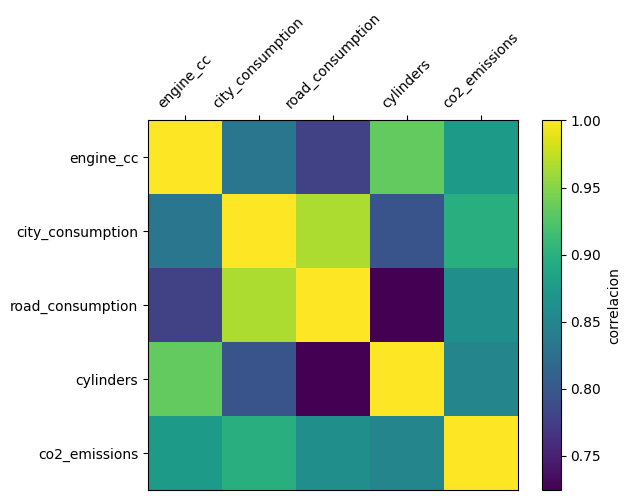

In [40]:
column_names = ['engine_cc', 'city_consumption', 'road_consumption', 'cylinders', 'co2_emissions']
#plt.imshow(matriz, cmap="inferno", vmax=1, vmin=-1)
plt.imshow(matriz, cmap="viridis")
#plt.imshow(np.tril(matriz, cmap="viridis"))
plt.colorbar(label="correlacion")
plt.xticks(range(len(column_names)), column_names, rotation=45)
plt.yticks(range(len(column_names)), column_names)
plt.gca().xaxis.set_ticks_position("top")

## SEABORN

<Axes: >

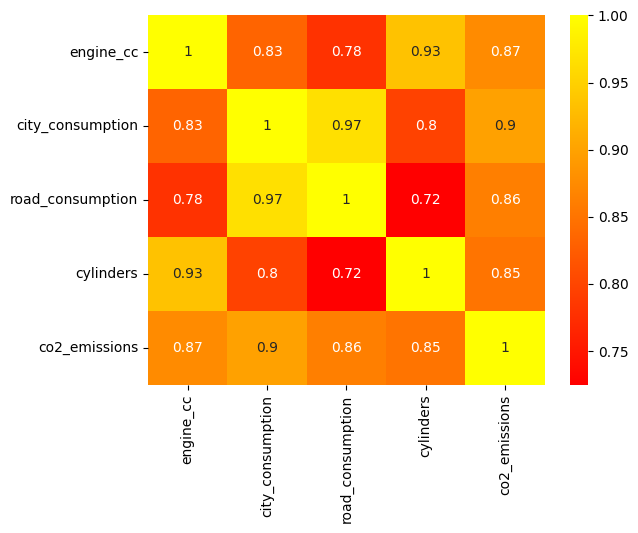

In [41]:
# !pip install seaborn
# import seaborn as sns

sns.heatmap(matriz, annot=True, cmap='autumn', xticklabels=column_names, yticklabels=column_names)

## OPCIONALES EJERCICIO MODULO 1

In [42]:
#opcional ejercicio modulo 1
def read_int(message):
    while True:
        try:
            number = int(input(message))
            return number
        except ValueError:
            print("Numero incorrecto, prueba de nuevo")
            
def read_float(message):
    while True:
        try:
            number = float(input(message))
            return number
        except ValueError:
            print("Numero incorrecto, prueba de nuevo")
            
def read_date(message):
    cont = 0
    while True:
        if cont ==4:
            return datetime.datetime()     
        try:
            #cambiar aqui y pasar fecha usar datetime
            number = int(input(message))
            return number
        except ValueError:
            print("Fecha incorrecta, prueba de nuevo")    
            cont += 1
            
def read_boolean(message):
    while True:
        try:
            number = bool(input(message))
            return number
        except ValueError:
            print("Valor incorrecto, prueba de nuevo")        
        
    
"""if option == 2
    edad = read_int("Introduce tu edad")   
    salary = read_float("Introduce tu salario")
    birthdate = read_date("Introduce tu fecha de nacimiento ISO: dd")
    estudiante = read_boolean("Introduce si estudia (S/N)")"""

'if option == 2\n    edad = read_int("Introduce tu edad")   \n    salary = read_float("Introduce tu salario")\n    birthdate = read_date("Introduce tu fecha de nacimiento ISO: dd")\n    estudiante = read_boolean("Introduce si estudia (S/N)")'

In [43]:
matriz44 = list()
#matriz44 =[]
for i in range(4):
    fila = list()
    
    for j in range(4):
        fila.append(random.randint(1, 100))
        
    matriz44.append(fila)

#print(matriz44)

np.array(matriz44)

matriz44

[[75, 8, 83, 28], [63, 19, 60, 78], [8, 66, 73, 91], [64, 35, 35, 73]]

In [44]:
matriz44 = np.array([[random.randint(1, 100) for j in range(4)] for i in range(4)])
matriz44

array([[ 3, 34, 99, 45],
       [36, 38, 89, 57],
       [14, 38, 34, 34],
       [80, 80, 27, 57]])

In [45]:
def generar_matriz(m=4, n=4):
    matriz44 = list()
    if m <= 0  or n <=0:
        raise ValueError("Dimensiones incorrectas")
    for i in range(m):
        fila = list()
    
        for j in range(n):
            fila.append(random.randint(1, 100))
        
        matriz44.append(fila) 
    return np.array(matriz44) 
    
    
    
    
    
x = generar_matriz(2, 10)
y = generar_matriz()
print(x)
print(y)

[[71 44 67 59 73 79 25 71 39 32]
 [95 38 23 65 94 62 97 51 35 72]]
[[69 38 42 39]
 [36 59 45 17]
 [73 89 10 50]
 [37 84 59 82]]


## Estandarización de datos:  
Media = a 0 y desviación = 1

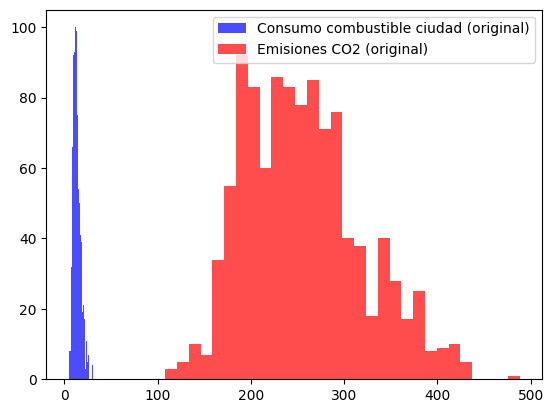

In [46]:
plt.hist(city_consumption, bins=30, color="blue", alpha=0.7, label="Consumo combustible ciudad (original)")
plt.hist(co2_emissions, bins=30, color="red",  alpha=0.7, label="Emisiones CO2 (original)")
plt.legend();


Media consumo original: 13.29653263092041
Media consumo estandarizada: [-0.8285578  -0.5114329  -1.7799324  ...  0.02523997 -0.09673114
  0.3911533 ]
Emisiones Co2 original: 256.2286682128906
Emisiones Co2 estandarizado: [-0.9508399  -0.55616075 -1.8980697  ...  0.23319744  0.05953863
  0.5963022 ]


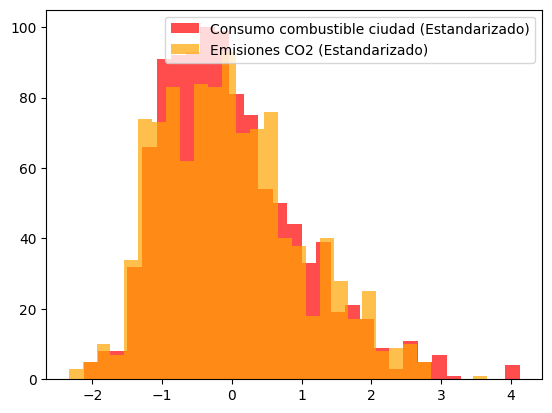

In [47]:
#estandarizamos y volvemos a pintar el histograma
media_con = np.mean(city_consumption)
desv_con = np.std(city_consumption)
media_co2 = np.mean(co2_emissions)
desv_co2 =  np.std(co2_emissions)

#resultado1 = [(x - media_con) / desv_con for x in city_consumption]
resultado1 = (city_consumption - media_con) / desv_con
#resultado2 = [(x - media_co2) / desv_co2 for x in co2_emissions]
resultado2 = (co2_emissions - media_co2) / desv_co2

print(f"Media consumo original: {media_con}")
print(f"Media consumo estandarizada: {resultado1}")
print(f"Emisiones Co2 original: {media_co2}")
print(f"Emisiones Co2 estandarizado: {resultado2}")

plt.hist(resultado1, bins=30, color="red", alpha=0.7, label="Consumo combustible ciudad (Estandarizado)")
#plt.hist(city_consumption, bins=30, color="blue", alpha=0.7, label="Consumo combustible ciudad (original)")
#plt.hist(co2_emissions, bins=30, color="red",  alpha=0.7, label="Emisiones CO2 (original)")
plt.hist(resultado2, bins=30, color="orange", alpha=0.7, label="Emisiones CO2 (Estandarizado)")
plt.legend();

## SUBPLOTS

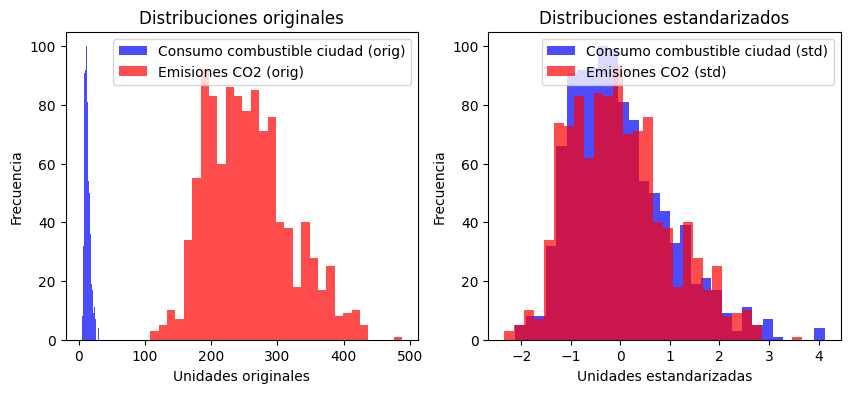

In [48]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(city_consumption, bins=30, color="blue", alpha=0.7, label="Consumo combustible ciudad (orig)")
plt.hist(co2_emissions, bins=30, color="red",  alpha=0.7, label="Emisiones CO2 (orig)")
plt.title("Distribuciones originales")
plt.xlabel("Unidades originales")
plt.ylabel("Frecuencia")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(resultado1, bins=30, color="blue", alpha=0.7, label="Consumo combustible ciudad (std)")
plt.hist(resultado2, bins=30, color="red",  alpha=0.7, label="Emisiones CO2 (std)")
plt.title("Distribuciones estandarizados")
plt.xlabel("Unidades estandarizadas")
plt.ylabel("Frecuencia")
plt.legend()


## COEFICIENTE DE ASIMETRIA
* Nro cercano a cero no hay asimetria
* Si es positivo (cola hacia la derecha) o negativo (cola hacia la izquierda) hay asimetria
### Metodo stats.skew()

In [49]:
print(f"Coeficiente de asimetria: {stats.skew(city_consumption)}")
print(f"Coeficiente de asimetria: {stats.skew(co2_emissions)}")

Coeficiente de asimetria: 0.8993620872497559
Coeficiente de asimetria: 0.5187845230102539


# Curtosis 
para verlo bien hay que pintarlo 
*mayor que cero : Leptocurtica , cola ligera
*cero: curva normal
*Menor que cero: Paticurtica, decaimiento lento
### Metodo stats.kurtosis()


In [50]:
print(f"Coeficiente de curtosis consumo: {stats.kurtosis(city_consumption)}")
print(f"Coeficiente de curtosis co2: {stats.kurtosis(co2_emissions)}")

Coeficiente de curtosis consumo: 0.9413409233093262
Coeficiente de curtosis co2: -0.11465811729431152


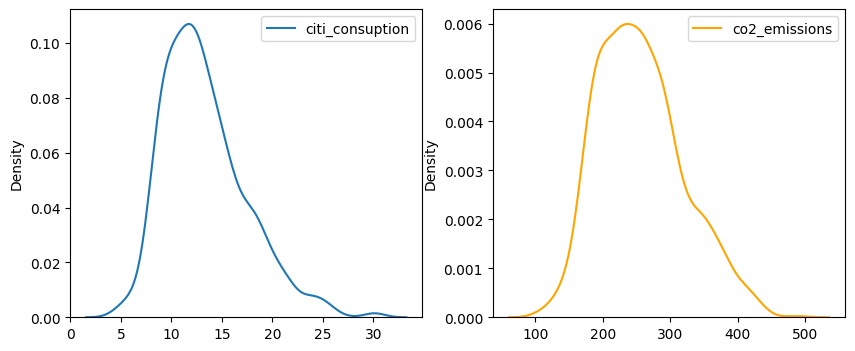

In [51]:
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.kdeplot(city_consumption, label="citi_consuption")
plt.legend()

plt.subplot(1, 2, 2)
sns.kdeplot(co2_emissions, label="co2_emissions", color="orange")
plt.legend()

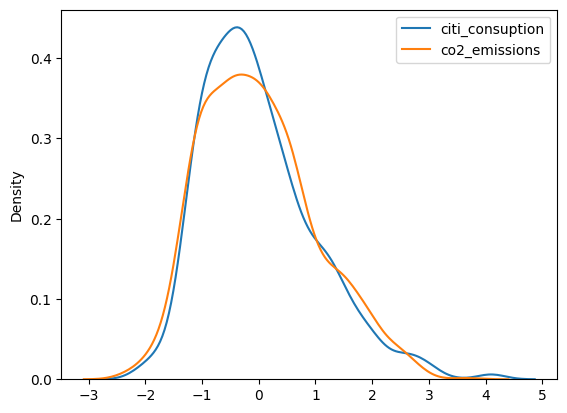

In [52]:
sns.kdeplot(resultado1, label="citi_consuption")
sns.kdeplot(resultado2, label="co2_emissions")
plt.legend()

## Generar datos ficticios para ver mejor las graficas

In [53]:
from scipy.stats import skewnorm

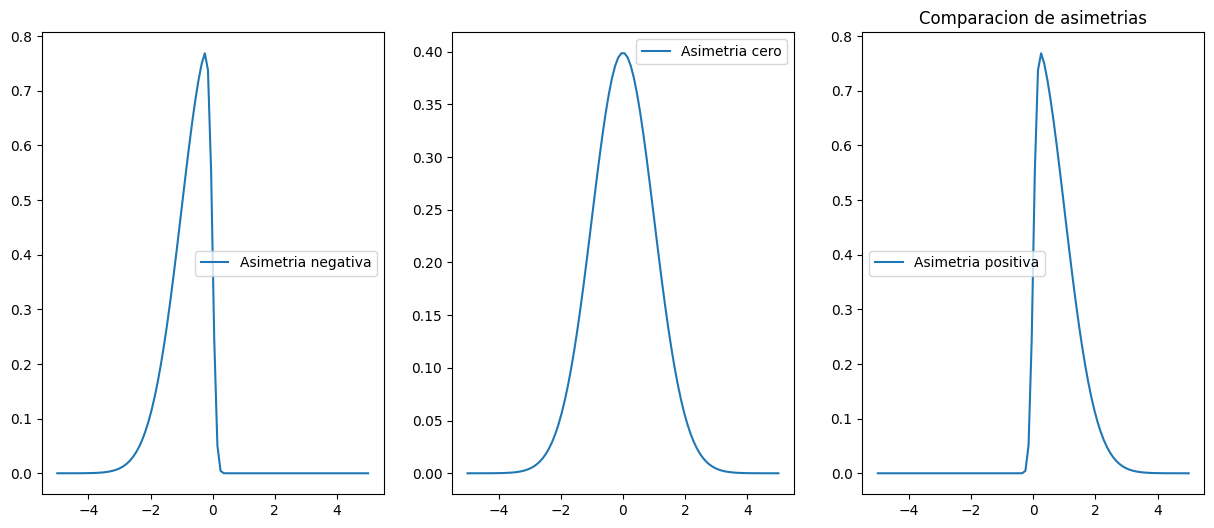

In [54]:
x = np.linspace(-5, 5, 100)

negative_skew = skewnorm.pdf(x, a=-10)
zero_skew = skewnorm.pdf(x, a=0)
positive_skew = skewnorm.pdf(x, a =10)

plt.figure(figsize=(15, 6))
plt.subplot(1, 3, 1)
plt.plot(x, negative_skew, label="Asimetria negativa")
plt.legend()
plt.subplot(1, 3, 2)
plt.plot(x, zero_skew, label="Asimetria cero") # campana de gauss
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(x, positive_skew, label="Asimetria positiva")
plt.legend()
plt.title("Comparacion de asimetrias");

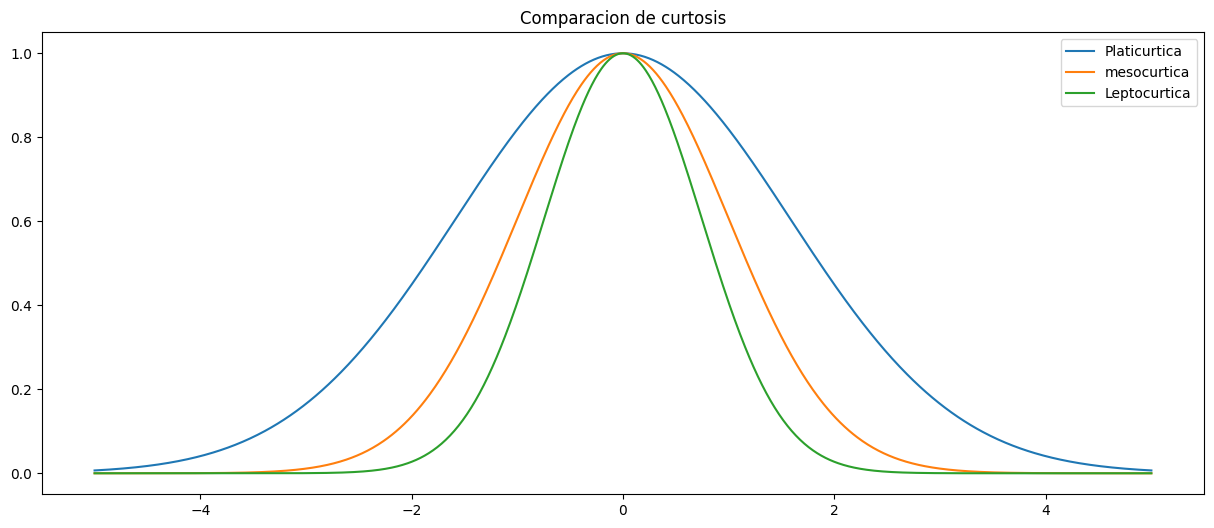

In [55]:
x = np.linspace(-5, 5, 1000)

platicurtic = np.exp(-0.2 * x**2) # aplanada
mesocurtic = np.exp(-0.5 * x**2) # estardar
leptocurtic = np.exp(-0.9 * x**2) # mas alta

plt.figure(figsize=(15, 6))
#plt.subplot(1, 3, 1)
plt.plot(x, platicurtic, label="Platicurtica")
plt.legend()
#plt.subplot(1, 3, 2)
plt.plot(x, mesocurtic, label="mesocurtica") # campana de gauss
plt.legend()
#plt.subplot(1, 3, 3)
plt.plot(x, leptocurtic, label="Leptocurtica")
plt.legend()
plt.title("Comparacion de curtosis");

# Calculo diferencial

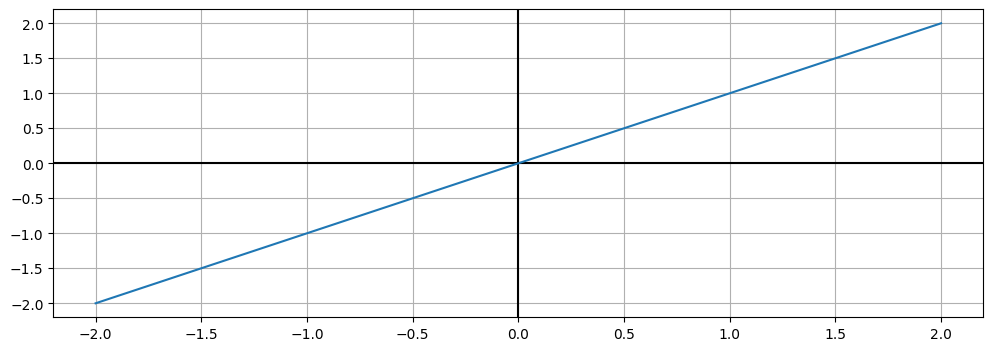

In [56]:
x= np.linspace(-2, 2, 1000)
y= x
plt.figure(figsize=(12, 4))
plt.axhline(0, color="black")
plt.axvline(0, color="black")
plt.plot(x, y)
#plt.axis(-0.5, 1.5, -1, -2) #acotar los limites de la grafica
plt.grid()

## Modificar valores (para eliminar la simetria)

In [57]:
# Funcion Raiz:  mas suave que la logaritmica ayuda a reducir la asimetria
city_consumption_sqrt = np.sqrt(city_consumption)
co2_emissions_sqrt = np.sqrt(co2_emissions)



In [58]:
# Funcion logaritmo: comprime las diferencias entre valores grandes y valores pequeños, habitual cuando
# hay un sesgo hacia valores grandes
city_consumption_log = np.log(city_consumption)
co2_emissions_log = np.log(co2_emissions)

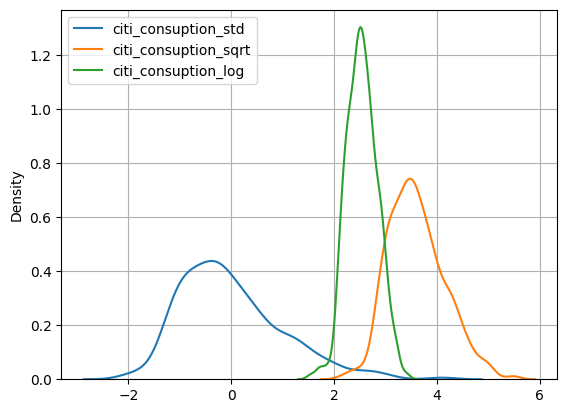

In [59]:
sns.kdeplot(resultado1, label="citi_consuption_std")
sns.kdeplot(city_consumption_sqrt, label="citi_consuption_sqrt")
sns.kdeplot(city_consumption_log, label="citi_consuption_log")
plt.legend()
plt.grid()

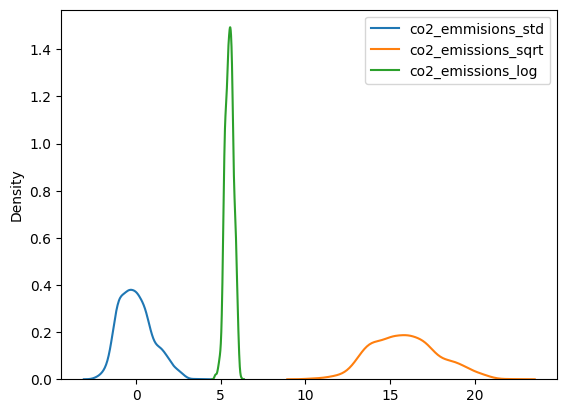

In [60]:
sns.kdeplot(resultado2, label="co2_emmisions_std")
sns.kdeplot(co2_emissions_sqrt, label="co2_emissions_sqrt")
sns.kdeplot(co2_emissions_log, label="co2_emissions_log")
plt.legend()

# Contraste hipotesis

- Realiza un contraste de hipótesis y comprueba si se gasta más combustible en la ciudad que en la autovía.
    - **fuel_city**: gasto en ciudad
    - **fuel_hwy**: gasto en autovía
    - $H_0$: el gasto de combustible en la ciudad es igual o menor al gasto en la autovía.
    - $H_1$: el gasto de combustible en la ciudad es mayor al gasto en la autovía.
    
_**Pista**: hay que aplicar una prueba **t de Student** para **muestras pareadas** `stats.ttest_rel()`, o una prueba **Wilcoxon** para **muestras pareadas** `stats.wilcoxon()`, dependiendo de si se cumplen los supuestos de normalidad y homogeneidad de varianzas. Pueden especificar el parámetro `alternative` con el argumento `"greater"` para un contraste de tipo `a>b`._

In [61]:
print(city_consumption[:5])
print(road_consumption[:5])

[ 9.9 11.2  6.  12.7 12.1]
[6.7 7.7 5.8 9.1 8.7]


In [62]:
alpha = 0.05 #valor de significancia, sirve para aceptar o rechazar pruebas

### Normalidad

In [63]:
# normalidad: combina skew y curtosis para saber si los datos tienen una normalidad
_, p_city = stats.normaltest(city_consumption) # _, se utiliza para ignorar una variable
p_city
_, p_road = stats.normaltest(road_consumption)
p_road
print("Pruebas de normalidad")
print(f"p_city {p_city} y p_road {p_road}")
# Se puede añadir a mayores la prueba de stats.shapiro()

Pruebas de normalidad
p_city 6.448322750596955e-29 y p_road 1.7367047265152944e-50


### Homogeneidad de varianzas

In [64]:
#Homegeneidad de varianzas : es decir que las varianzas sean similares

_, p_var = stats.levene(city_consumption, road_consumption)
p_var
print("Pruebas de varianza")
print(f"p_var {p_var} ")


Pruebas de varianza
p_var 1.6747776844619997e-25 


### Comprobar valores p obtenidos vs significancia

In [65]:
suposiciones = p_city > alpha and p_road > alpha and p_var > alpha #se pasa a una bool para poder utilizarla mas tarde
if suposiciones:
    print("Se cumple la asuncion de NORMALIDAD y HOMOGENEIDAD DE VARIANZAS")
else:
    print("NO se cumple la asuncion de NORMALIDAD y HOMOGENEIDAD DE VARIANZAS")

NO se cumple la asuncion de NORMALIDAD y HOMOGENEIDAD DE VARIANZAS


In [66]:
print(f"c_media: {np.mean(city_consumption)}")
print(f"c_media: {np.mean(road_consumption)}")

c_media: 13.29653263092041
c_media: 9.474601745605469


In [67]:
# contraste de hipotesis
if suposiciones:
    print("Pruebas paramétricas")
    _, p = stats.ttest_rel(city_consumption, road_consumption, alternative="greater")#si la media de city es mayor que la de road
else:
    print("Pruebas no paramétricas")
    _, p = stats.wilcoxon(city_consumption, road_consumption, alternative="greater")
    
print((f"contraste de hipotesis p_value: {p}"))

Pruebas no paramétricas
contraste de hipotesis p_value: 2.9810270094239354e-176


In [68]:
if p < alpha:
    print("H1 VERDADERO (H alternativa): El combustible en city es mayor que en road. RECHAZAMOS H0 (H Nula)")
else:
    print("H0 VERDADERO (H nula): El combustible en city es menor que en road. RECHAZAMOS H1 (H Alternativa)")    

H1 VERDADERO (H alternativa): El combustible en city es mayor que en road. RECHAZAMOS H0 (H Nula)
